-------------------------------
#### Evaluating the quality of generated samples for numeric data 
-----------------------------

#### Load model from saved artifacts

In [1]:
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler

In [2]:
# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 8),
            nn.Tanh()
        )

    def forward(self, x):
        generated_data = self.model(x)
        return generated_data

In [3]:
# Initialize the networks
#discriminator = Discriminator()
generator     = Generator()
scaler        = StandardScaler()

In [4]:
# Load the GAN model
checkpoint = torch.load(r'C:\Users\bhupe\OneDrive\AI-notebook-dir\300 - ADL - Advanced Deep Learning\50 - ADL - Generative Models\51 - GANs - New folder\model\gan_model_cal_housing.pt')

# Extract the scaler from the checkpoint
scaler = checkpoint['scaler']

generator.load_state_dict(checkpoint['generator_state_dict'])
#discriminator.load_state_dict(checkpoint['discriminator_state_dict'])

D:\ANACONDA\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<All keys matched successfully>

In [5]:
# Set the generator network to evaluation mode
generator.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=8, bias=True)
    (5): Tanh()
  )
)

#### Generate new samples

In [6]:
num_samples = 5000
z = torch.randn(num_samples, 100)  # Generate random noise as input

In [7]:
with torch.no_grad():
    generated_samples = generator(z)

In [8]:
generated_samples.shape

torch.Size([5000, 8])

In [9]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import fetch_california_housing

# # Load the California Housing dataset
# data = fetch_california_housing()
# features = data.data

# # Normalize the features using StandardScaler
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)

# Rescale the generated samples back to the original scale
generated_samples = scaler.inverse_transform(generated_samples)

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

# Load the California Housing dataset
data     = fetch_california_housing()
features = data.data

In [11]:
features = np.array(features)
features

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [12]:
df_real      = pd.DataFrame(features)
df_generated = pd.DataFrame(generated_samples)

In [19]:
df_real.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

**method 1**

In [13]:
from scipy.stats import ttest_ind

In [14]:
for col_nbr in range(8):
    # Perform a t-test to compare the means of two sets of samples
    t_statistic, p_value = ttest_ind(df_real[col_nbr], df_generated[col_nbr])
    
    if p_value < 0.5:
        # Print the t-statistic and p-value
        print(f"Col: {col_nbr:2d}, P-Value: {p_value:.4f}, distributions are different")

Col:  0, P-Value: 0.0000, distributions are different
Col:  1, P-Value: 0.0000, distributions are different
Col:  2, P-Value: 0.0000, distributions are different
Col:  3, P-Value: 0.0000, distributions are different
Col:  4, P-Value: 0.0000, distributions are different
Col:  6, P-Value: 0.0000, distributions are different
Col:  7, P-Value: 0.0000, distributions are different


In [15]:
df_real.describe()

,0,1,2,3,4,5,6,7
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [16]:
df_generated.describe()

,0,1,2,3,4,5,6,7
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.566887,29.518212,4.912152,1.050808,1300.101744,2.976864,34.453210,-118.650203
std,1.024875,7.071550,0.972706,0.087942,527.859898,0.782505,1.095817,0.855364
min,1.970895,16.054234,2.954887,0.769291,293.042191,0.052034,33.497563,-121.571742
25%,2.738368,23.913101,4.284704,1.003998,936.093306,2.543687,33.864718,-118.870923
50%,3.439776,31.016490,4.989301,1.040222,1272.840661,2.842313,33.990308,-118.290052
75%,4.322375,35.360132,5.569545,1.077521,1566.029997,3.262792,34.285261,-118.145090
max,5.770447,41.224739,7.883134,1.570074,2557.911432,8.616133,37.767762,-117.566221


**method 2**

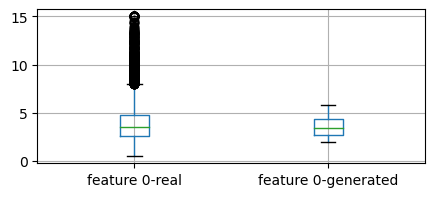

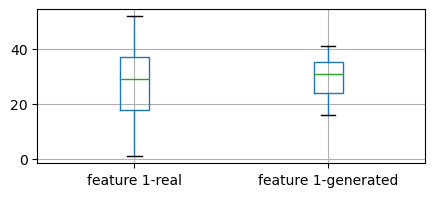

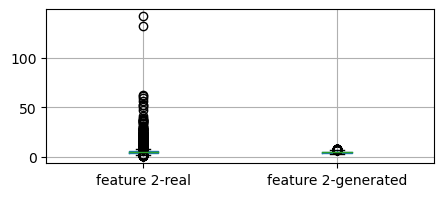

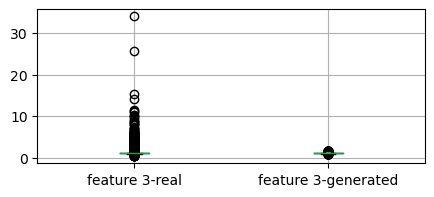

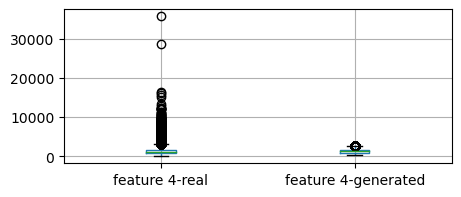

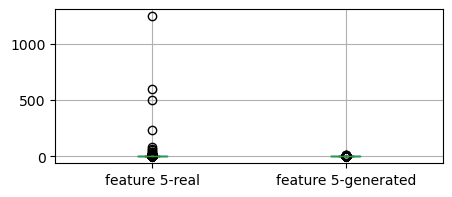

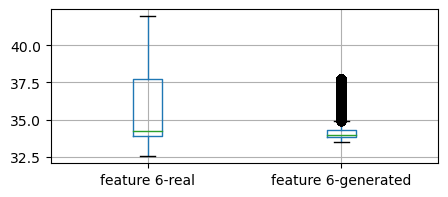

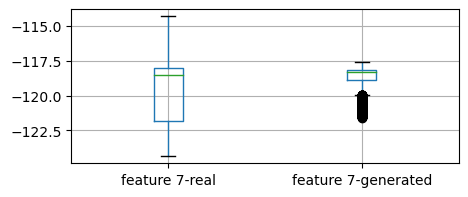

In [17]:
for col_nbr in range(8):
    
    # Set the figure size
    fig, ax = plt.subplots(figsize=(5, 2))

    # Concatenate the columns from both DataFrames into a single DataFrame
    df = pd.concat([df_real[col_nbr], df_generated[col_nbr]], axis=1)
    
    df.columns = ['feature '+str(col_nbr) + '-real', 
                  'feature '+str(col_nbr) + '-generated']
    
    # Create a boxplot
    df.boxplot()
    
    plt.show()

**method 3** - using OC SVM

In [20]:
from sklearn.svm import OneClassSVM

In [21]:
# Create a one-class SVM model
svm_model = OneClassSVM()

# Fit the one-class SVM model on the real training data
svm_model.fit(df_real)

OneClassSVM()

In [22]:
# Evaluate the generated samples using the one-class SVM model
evaluation = svm_model.predict(df_generated)

In [23]:
# Calculate the percentage of generated samples that are classified as inliers (1)
percentage_inliers = (evaluation[evaluation == 1].shape[0] / evaluation.shape[0]) * 100

# Print the evaluation results
print(f"Percentage of generated samples classified as inliers: {percentage_inliers}%")

Percentage of generated samples classified as inliers: 65.42%


**method - 4** - using PCA

In [24]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [25]:
# Create a PCA object with the desired number of components
n_components = 2  # Number of principal components to keep
pca = PCA(n_components=n_components)

In [26]:
# Fit the PCA model to the data
pca.fit(df_real)

PCA(n_components=2)

In [27]:
# Transform the data to the principal components
transformed_data_pca = pca.transform(df_real)

In [28]:
# Create a t-SNE object with the desired number of dimensions
n_dimensions = 2  # Number of dimensions for t-SNE visualization
tsne = TSNE(n_components=n_dimensions)

# Fit the t-SNE model to the PCA-transformed data
transformed_data_tsne = tsne.fit_transform(transformed_data_pca)

In [29]:
# Create a new DataFrame with the transformed data from t-SNE
transformed_df_tsne = pd.DataFrame(data=transformed_data_tsne, columns=[f'Dimension {i+1}' for i in range(n_dimensions)])

In [30]:
# apply PCA-tsne on generated samples
# Create a PCA object with the desired number of components
n_components = 2  # Number of principal components to keep

pca_gen = PCA(n_components=n_components)

# Transform the data to the principal components
transformed_data_pca_gen = pca.fit_transform(df_generated)

# Create a t-SNE object with the desired number of dimensions
n_dimensions = 2  # Number of dimensions for t-SNE visualization
tsne_gen = TSNE(n_components=n_dimensions)

# Fit the t-SNE model to the PCA-transformed data
transformed_data_tsne_gen = tsne.fit_transform(transformed_data_pca_gen)

# Create a new DataFrame with the transformed data from t-SNE
transformed_df_tsne_gen = pd.DataFrame(data=transformed_data_tsne_gen, columns=[f'Dimension {i+1}' for i in range(n_dimensions)])

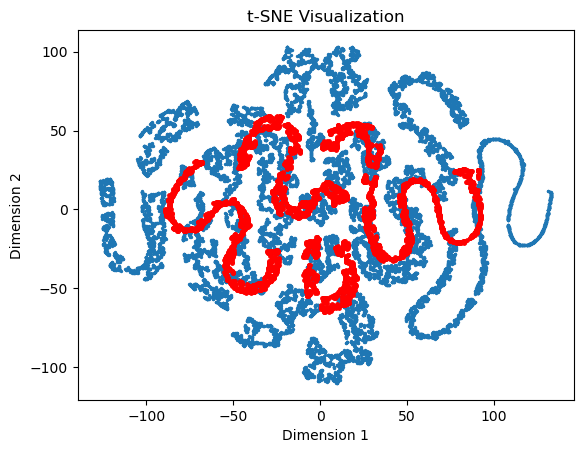

In [31]:
# Plot the t-SNE visualization
plt.scatter(transformed_df_tsne['Dimension 1'], transformed_df_tsne['Dimension 2'], s=2)
plt.scatter(transformed_df_tsne_gen['Dimension 1'], transformed_df_tsne_gen['Dimension 2'], s=6, c='r')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

**mahalanobis()** - distance between 2 dataset

In [32]:
np.set_printoptions(linewidth=140)

In [33]:
def calc_mah_distance(X1_arr, X2_arr):
    # Calculate the mean vector of each dataset
    mean_X1 = np.mean(X1_arr, axis=0)
    mean_X2 = np.mean(X2_arr, axis=0)
    
    # Calculate the covariance matrix of each dataset
    cov_X1 = np.cov(X1_arr.T)
    cov_X2 = np.cov(X2_arr.T)
    
    # Compute the inverse of the covariance matrix of X2
    inv_cov_X2 = np.linalg.inv(cov_X2)
    
    # Compute the Mahalanobis distance between X1 and X2
    mahalanobis_dist = np.sqrt(np.sum(np.square(mean_X1 - mean_X2) @ inv_cov_X2 @ (mean_X1 - mean_X2)))
    
    return mahalanobis_dist

In [34]:
calc_mah_distance(df_real.values, df_generated.values)

3.659569613677974

``Threshold``: To determine whether the Mahalanobis distance is significant

In [36]:
n_iters = 15

# Set the desired number of samples to take
num_samples = 7500

data_real_arr = df_real.values

# Get the number of rows in the data array
n_rows = data_real_arr.shape[0]

for iter in range(n_iters):
    
    # Set the seed for the random number generator
    np.random.seed(iter)

    # Generate random indices for sampling without replacement
    # these rows will be removed from the orginal array
    indices_of_samples = np.random.choice(n_rows, size=num_samples, replace=False)

    # Take a random sample of rows from the data array
    random_samples = data_real_arr[indices_of_samples, :]

    # Create a boolean mask to select rows to keep
    mask = np.ones(n_rows, dtype=bool)
    mask[indices_of_samples] = False

    # Remove the selected rows from the original array
    data_real_without_samples = data_real_arr[mask]
    
    mahalanobis_dist = calc_mah_distance(data_real_without_samples, random_samples)
    
    # Print the Mahalanobis distance
    print("Mahalanobis Distance:", mahalanobis_dist)


Mahalanobis Distance: nan
Mahalanobis Distance: 0.059289224328718124
Mahalanobis Distance: 0.11807298162423618
Mahalanobis Distance: 0.07203661815972934
Mahalanobis Distance: 0.07113041909703482
Mahalanobis Distance: 0.013888076923118102
Mahalanobis Distance: 0.06036400346312575
Mahalanobis Distance: 0.013292962257986367
Mahalanobis Distance: 0.021779351046327423
Mahalanobis Distance: nan
Mahalanobis Distance: 0.04919808852529166
Mahalanobis Distance: 0.050460742326938646
Mahalanobis Distance: 0.06604991531986604
Mahalanobis Distance: 0.07933141409254361
Mahalanobis Distance: nan


C:\Users\bhupe\AppData\Local\Temp\ipykernel_31664\869429793.py:14: RuntimeWarning: invalid value encountered in sqrt
  mahalanobis_dist = np.sqrt(np.sum(np.square(mean_X1 - mean_X2) @ inv_cov_X2 @ (mean_X1 - mean_X2)))
